In [2]:
import pandas as pd
# import regex as re

import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from nltk.tokenize import RegexpTokenizer
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# from sklearn.feature_extraction import stop_words, text

%config InlineBackend.figure_format = 'retina'


/Users/rwilkening/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('./Datasets/cleaned_w_sentiment.csv')
data.head(2)

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,questions_score,tag_id,tag_name,answers_id,answers_author_id,answers_date_added,answers_body,answers_score,qa_match,questions_length,answers_length,has_tag,questions_sentiment,answers_sentiment
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,teacher career question,what is a maths teacher what is a ma...,1.0,14147.0,lecture,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,2016-04-29 19:40:14+00:00,hi you are asking a very interesting question ...,0.0,1,180376,180376,1,0.4404,0.8122
1,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,teacher career question,what is a maths teacher what is a ma...,1.0,27490.0,college,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,2016-04-29 19:40:14+00:00,hi you are asking a very interesting question ...,0.0,1,180376,180376,1,0.4404,0.8122


In [4]:
pros_df = pd.read_csv('./Datasets/professionals.csv')

In [5]:
pros_df.head()

,professionals_id,professionals_location,professionals_industry,professionals_headline,professionals_date_joined
0,9ced4ce7519049c0944147afb75a8ce3,NaN,NaN,NaN,2011-10-05 20:35:19 UTC+0000
1,f718dcf6d2ec4cb0a52a9db59d7f9e67,NaN,NaN,NaN,2011-10-05 20:49:21 UTC+0000
2,0c673e046d824ec0ad0ebe012a0673e4,"New York, New York",NaN,NaN,2011-10-18 17:31:26 UTC+0000
3,977428d851b24183b223be0eb8619a8c,"Boston, Massachusetts",NaN,NaN,2011-11-09 20:39:29 UTC+0000
4,e2d57e5041a44f489288397c9904c2b2,NaN,NaN,NaN,2011-12-10 22:14:44 UTC+0000


In [6]:
data.rename(columns = {'answers_author_id': 'professionals_id'}, inplace=True)

In [7]:
data.head(3)

,questions_id,questions_author_id,questions_date_added,questions_title,questions_body,questions_score,tag_id,tag_name,answers_id,professionals_id,answers_date_added,answers_body,answers_score,qa_match,questions_length,answers_length,has_tag,questions_sentiment,answers_sentiment
0,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,teacher career question,what is a maths teacher what is a ma...,1.0,14147.0,lecture,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,2016-04-29 19:40:14+00:00,hi you are asking a very interesting question ...,0.0,1,180376,180376,1,0.4404,0.8122
1,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,teacher career question,what is a maths teacher what is a ma...,1.0,27490.0,college,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,2016-04-29 19:40:14+00:00,hi you are asking a very interesting question ...,0.0,1,180376,180376,1,0.4404,0.8122
2,332a511f1569444485cf7a7a556a5e54,8f6f374ffd834d258ab69d376dd998f5,2016-04-26 11:14:26+00:00,teacher career question,what is a maths teacher what is a ma...,1.0,21438.0,professor,4e5f01128cae4f6d8fd697cec5dca60c,36ff3b3666df400f956f8335cf53e09e,2016-04-29 19:40:14+00:00,hi you are asking a very interesting question ...,0.0,1,180376,180376,1,0.4404,0.8122


In [8]:
data = data.merge(pros_df, on='professionals_id', how='left')

In [33]:
data.describe()

,questions_score,tag_id,answers_score,qa_match,questions_length,answers_length,has_tag,questions_sentiment,answers_sentiment
count,180376.000000,180376.000000,180376.000000,180376.000000,180376.0,180376.0,180376.0,180376.000000,180376.000000
mean,4.873115,16850.235325,0.448413,0.987027,180376.0,180376.0,1.0,0.390648,0.762894
std,7.536732,10280.952759,0.936107,0.113158,0.0,0.0,0.0,0.435366,0.360136
min,0.000000,0.000000,0.000000,0.000000,180376.0,180376.0,1.0,-0.992900,-0.996800
25%,2.000000,9521.000000,0.000000,1.000000,180376.0,180376.0,1.0,0.000000,0.726900
50%,4.000000,18351.000000,0.000000,1.000000,180376.0,180376.0,1.0,0.440400,0.931200
75%,5.000000,25524.000000,1.000000,1.000000,180376.0,180376.0,1.0,0.775000,0.979300
max,125.000000,39250.000000,30.000000,1.000000,180376.0,180376.0,1.0,0.998300,1.000000


In [34]:
data.shape

(180376, 23)

In [35]:
data.dtypes

questions_id                  object
questions_author_id           object
questions_date_added          object
questions_title               object
questions_body                object
questions_score              float64
tag_id                       float64
tag_name                      object
answers_id                    object
professionals_id              object
answers_date_added            object
answers_body                  object
answers_score                float64
qa_match                       int64
questions_length               int64
answers_length                 int64
has_tag                        int64
questions_sentiment          float64
answers_sentiment            float64
professionals_location        object
professionals_industry        object
professionals_headline        object
professionals_date_joined     object
dtype: object

In [36]:
data.groupby('qa_match').mean()

,questions_score,tag_id,answers_score,questions_length,answers_length,has_tag,questions_sentiment,answers_sentiment
qa_match,,,,,,,,
0,0.755556,19804.312393,0.000000,180376,180376,1,0.273007,0.000000
1,4.927234,16811.408681,0.454307,180376,180376,1,0.392194,0.772921


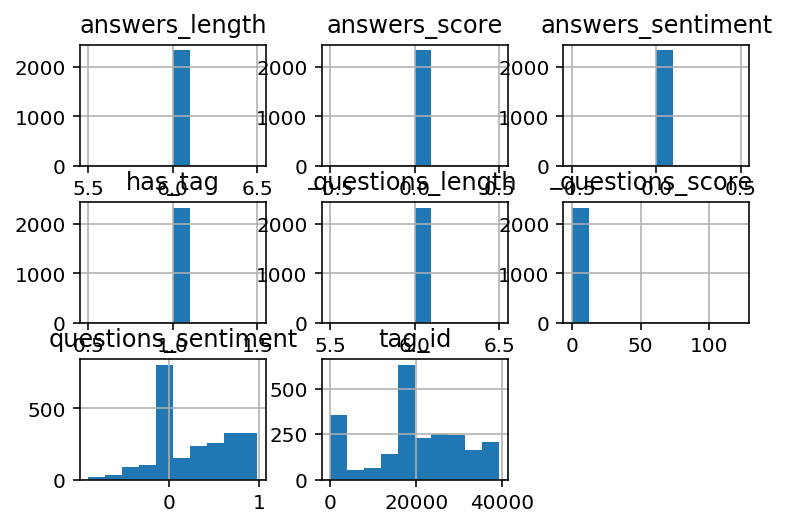

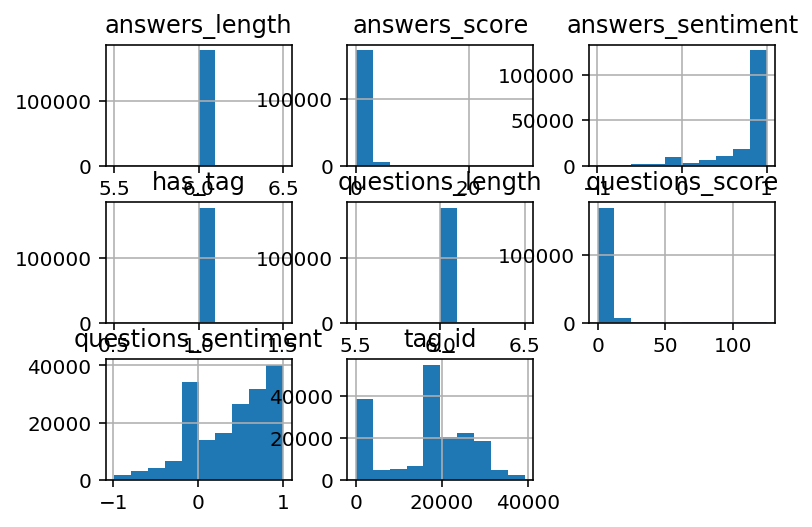

In [37]:
data.groupby('qa_match').hist();

#### Filling Nulls

I noticed there are still some null values, though we inputed some values in the cleaning notebook, we needed further EDA to understand how inpute nulls inpacts the data. For now, we're just filling the 24 null values in `answers_body` with the string 'none'. Since this is such a small fraction of the data, it shouldn't have a significant impact on results.

In [38]:
data.isnull().sum()

questions_id                     0
questions_author_id              0
questions_date_added             0
questions_title                  0
questions_body                   0
questions_score                  0
tag_id                           0
tag_name                         0
answers_id                    2340
professionals_id              2340
answers_date_added            2340
answers_body                     0
answers_score                    0
qa_match                         0
questions_length                 0
answers_length                   0
has_tag                          0
questions_sentiment              0
answers_sentiment                0
professionals_location       14906
professionals_industry       19572
professionals_headline       13054
professionals_date_joined     5377
dtype: int64

#### Graphing Answers Sentmient Scores:

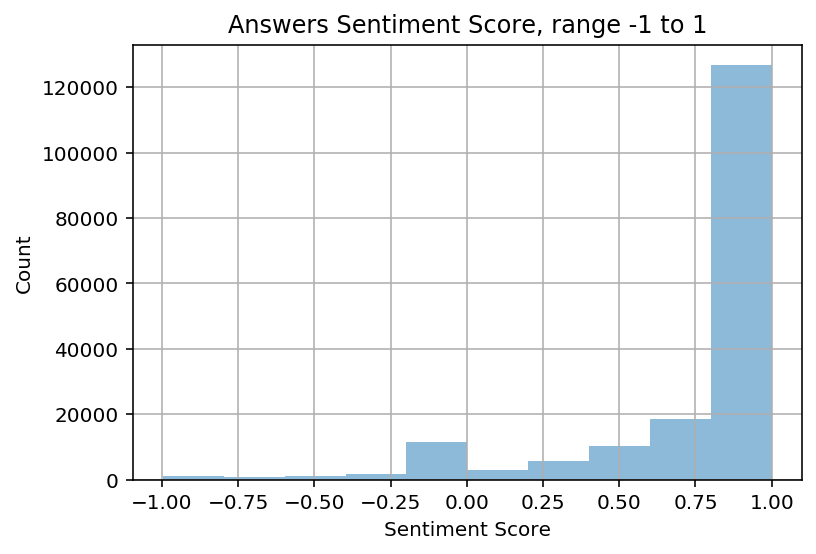

In [24]:
#Overall
data['answers_sentiment'].hist(alpha=.5);
plt.title('Answers Sentiment Score, range -1 to 1');
plt.ylabel("Count")
plt.xlabel("Sentiment Score");

#### Graphing Questions Sentiment Scores

We also included on the graph the number of questions that were and were not answered

In [25]:
data['questions_sentiment'].plot(kind = 'bar', label="all");
plt.title('Questions Sentiment Score, range -1 to 1');
plt.ylabel("Count")
plt.xlabel("Sentiment Score");

#was answered
data[data['qa_match'] == 1]['questions_sentiment'].plot(kind = 'bar', alpha = .5, label='answered');

#wasn't answered
data[data['qa_match'] == 0]['questions_sentiment'].plot(kind = 'bar', alpha = .7, label='not answered');
plt.legend();

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11716ed40> (for post_execute):


KeyboardInterrupt: 

#### Graphing the Distribution Scores from the Questions 

In [16]:
data['questions_score'].plot(kind = 'bar', label="all");
plt.title('Questions Score');
plt.ylabel("Count")
plt.xlabel("Questions Score");

#was answered
data[data['qa_match'] == 1]['questions_score'].plot(kind = 'bar', alpha = .5, label='answered');

#wasn't answered
data[data['qa_match'] == 0]['questions_score'].plot(kind = 'bar', alpha = .7, label='not answered');
plt.legend();

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x11caa8e60> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11cd29440> (for post_execute):


KeyboardInterrupt: 

#### Graphing the Distribution of the Scores from Questions 

In [ ]:
data['answers_score'].plot(kind = 'bar', label="all");
plt.title('Answers Score');
plt.ylabel("Count")
plt.xlabel("Answers Score");

#was answered
data[data['qa_match'] == 1]['Answers_score'].plot(kind = 'bar', alpha = .5, label='answered');

#wasn't answered
data[data['qa_match'] == 0]['Answers_score'].plot(kind = 'bar', alpha = .7, label='not answered');
plt.legend();

#### Checking the distribution of answers that were and were not answered

In [39]:
data['qa_match'].value_counts()

1    178036
0      2340
Name: qa_match, dtype: int64

## Exploring answers authors

We wanted to know more about who's answering the questions. Below we're looking at how many people are answering questions, how many questions they're answering.

<span style = 'color:red'> What tags are they answering. Is there a most popular tag? Are the tags they're answering part of their speciality. 

#### Exploring the Professionals Id's

In [40]:
data.groupby('professionals_id').mean()

,questions_score,tag_id,answers_score,qa_match,questions_length,answers_length,has_tag,questions_sentiment,answers_sentiment
professionals_id,,,,,,,,,
00009a0f9bda43eba47104e9ac62aff5,5.333333,14268.444444,0.000000,1,180376,180376,1,0.310433,0.969911
000d4635e5da41e3bfd83677ee11dda4,4.250000,16175.750000,0.000000,1,180376,180376,1,0.491750,0.863475
00271cc10e0245fba4a35e76e669c281,3.034483,18818.735632,0.000000,1,180376,180376,1,0.381360,0.873489
003cc21be89d4e42bc4424131a378e86,3.153846,16936.153846,0.000000,1,180376,180376,1,0.312308,0.621992
0046ab8089c04b3a8df3f8c28621a818,8.000000,18432.076923,0.307692,1,180376,180376,1,-0.026977,0.898562
...,...,...,...,...,...,...,...,...,...
ffdeaf7003a14c80aa237b35f6f636dc,4.000000,18304.000000,2.000000,1,180376,180376,1,0.000000,0.051600
ffe2f26d5c174e13b565d026e1d8c503,2.913043,14853.391304,0.304348,1,180376,180376,1,0.134896,0.614274
ffeaf7114b59443581b8acb5a9bfb38a,1.000000,13738.000000,0.000000,1,180376,180376,1,0.919200,0.973500


In [41]:
data['professionals_id'].nunique()

10169

In [42]:
data['professionals_id'].value_counts().describe()

count    10169.000000
mean        17.507720
std         88.767017
min          1.000000
25%          3.000000
50%          7.000000
75%         15.000000
max       6239.000000
Name: professionals_id, dtype: float64

In [52]:
data['professionals_industry'].nunique()

1200

In [9]:
data.groupby('professionals_industry').mean()

,questions_score,tag_id,answers_score,qa_match,questions_length,answers_length,has_tag,questions_sentiment,answers_sentiment
professionals_industry,,,,,,,,,
3D Printing & ecommerce,8.000000,15451.588235,1.470588,1,180376,180376,1,0.629971,0.958324
AIRLINES_AVIATION,3.666667,19361.000000,1.000000,1,180376,180376,1,0.353583,0.973950
APPAREL_AND_FASHION fitness,1.888889,10507.444444,0.000000,1,180376,180376,1,0.495367,0.809822
ARCHITECTURE_AND_PLANNING,3.962025,9587.113924,0.632911,1,180376,180376,1,0.389004,0.911476
ARTS_AND_CRAFTS,7.000000,21608.000000,2.000000,1,180376,180376,1,0.941300,0.872000
...,...,...,...,...,...,...,...,...,...
telecommunications,4.333333,18842.583333,0.333333,1,180376,180376,1,0.610633,0.655267
telecommunications - education,6.000000,16748.000000,0.000000,1,180376,180376,1,0.925900,0.991100
verizon enterprise solutions,26.000000,21646.000000,0.000000,1,180376,180376,1,0.000000,0.986800


### Exploring `has_tag`

In [43]:
data['has_tag'].value_counts()

1    180376
Name: has_tag, dtype: int64

In [22]:
data.groupby('questions_id').describe()['tag_id']

,count,mean,std,min,25%,50%,75%,max
questions_id,,,,,,,,
0003e7bf48f24b5c985f8fce96e611f3,12.0,22983.166667,11069.701309,1707.0,18073.00,27420.0,29649.00,33630.0
0006609dd4da40dcaa5a83e0499aba14,6.0,18365.000000,5.477226,18360.0,18360.00,18365.0,18370.00,18370.0
000af224bc2f4e94a19f8b62ba279cc4,2.0,9103.500000,12802.168273,51.0,4577.25,9103.5,13629.75,18156.0
000b30fb534b41f7b716fa9ebf9c3f35,8.0,14086.250000,10104.009370,29.0,9170.00,15216.5,20132.75,25883.0
0018752e44b44e26bb74a0a43232b4d6,2.0,25638.500000,10757.215462,18032.0,21835.25,25638.5,29441.75,33245.0
...,...,...,...,...,...,...,...,...
ffec9bebe1b84a02a1614c7dee44760f,3.0,23976.333333,10131.358514,18109.0,18127.00,18145.0,26910.00,35675.0
fff69ee35d574057aa9911e844e101b5,2.0,14688.000000,20712.571835,42.0,7365.00,14688.0,22011.00,29334.0
fff942d6b0b34a638ecf02428304cdb0,2.0,187.000000,0.000000,187.0,187.00,187.0,187.00,187.0


In [23]:
data.groupby('tag_id').describe()

questions_score                                                  \
                  count      mean       std  min   25%  50%   75%   max   
tag_id                                                                    
0.0              1700.0  6.914706  6.388107  0.0  3.00  5.0  9.00  37.0   
27.0              302.0  4.062914  2.636194  1.0  2.00  4.0  5.00  15.0   
29.0             1205.0  5.062241  5.736919  0.0  2.00  4.0  5.00  90.0   
36.0              414.0  3.888889  4.721003  0.0  2.00  3.0  4.00  76.0   
42.0              335.0  4.173134  9.448562  0.0  2.00  3.0  4.00  73.0   
...                 ...       ...       ...  ...   ...  ...   ...   ...   
39182.0             2.0  4.000000  0.000000  4.0  4.00  4.0  4.00   4.0   
39183.0             5.0  0.000000  0.000000  0.0  0.00  0.0  0.00   0.0   
39248.0             1.0  0.000000       NaN  0.0  0.00  0.0  0.00   0.0   
39249.0             2.0  0.500000  0.707107  0.0  0.25  0.5  0.75   1.0   
39250.0             1.0  0.000000       NaN  0.0  0.00  0.0  0.00   0.0   

        answers_score            ... questions_sentiment          \
                count      mean  ...                 75%     max   
tag_id                           ...                               
0.0            1700.0  0.746471  ...              0.7269  0.9941   
27.0            302.0  0.374172  ...              0.7430  0.9750   
29.0           1205.0  0.418257  ...              0.6808  0.9841   
36.0            414.0  0.420290  ...              0.7906  0.9960   
42.0            335.0  0.379104  ...              0.7463  0.9880   
...               ...       ...  ...                 ...     ...   
39182.0           2.0  2.000000  ...              0.8402  0.8402   
39183.0           5.0  0.000000  ...              0.7469  0.7469   
39248.0           1.0  0.000000  ...              0.3818  0.3818   
39249.0           2.0  0.000000  ...              0.0000  0.0000   
39250.0           1.0  0.000000  ...              0.0000  0.0000   

        answers_sentiment                                                 \
                    count      mean       std     min       25%      50%   
tag_id                                                                     
0.0                1700.0  0.763656  0.354034 -0.9832  0.718175  0.92470   
27.0                302.0  0.768609  0.346334 -0.9930  0.730625  0.92710   
29.0               1205.0  0.738800  0.373021 -0.9578  0.636900  0.92310   
36.0                414.0  0.680151  0.418283 -0.8834  0.463275  0.91125   
42.0                335.0  0.646164  0.431862 -0.9742  0.458800  0.84020   
...                   ...       ...       ...     ...       ...      ...   
39182.0               2.0  0.739000  0.346624  0.4939  0.616450  0.73900   
39183.0               5.0  0.287360  0.393484  0.0000  0.000000  0.00000   
39248.0               1.0  0.000000       NaN  0.0000  0.000000  0.00000   
39249.0               2.0  0.000000  0.000000  0.0000  0.000000  0.00000   
39250.0               1.0  0.000000       NaN  0.0000  0.000000  0.00000   

                           
              75%     max  
tag_id                     
0.0      0.978225  0.9999  
27.0     0.973950  0.9991  
29.0     0.982600  0.9996  
36.0     0.969775  0.9991  
42.0     0.959250  0.9990  
...           ...     ...  
39182.0  0.861550  0.9841  
39183.0  0.718400  0.7184  
39248.0  0.000000  0.0000  
39249.0  0.000000  0.0000  
39250.0  0.000000  0.0000  

[7092 rows x 64 columns]

In [24]:
data.groupby('tag_id').mean()

,questions_score,answers_score,qa_match,questions_length,answers_length,has_tag,questions_sentiment,answers_sentiment
tag_id,,,,,,,,
0.0,6.914706,0.746471,0.991765,180376.0,180376.0,1.0,0.359789,0.763656
27.0,4.062914,0.374172,0.996689,180376.0,180376.0,1.0,0.446522,0.768609
29.0,5.062241,0.418257,0.995021,180376.0,180376.0,1.0,0.319680,0.738800
36.0,3.888889,0.420290,0.973430,180376.0,180376.0,1.0,0.496184,0.680151
42.0,4.173134,0.379104,0.985075,180376.0,180376.0,1.0,0.362476,0.646164
...,...,...,...,...,...,...,...,...
39182.0,4.000000,2.000000,1.000000,180376.0,180376.0,1.0,0.840200,0.739000
39183.0,0.000000,0.000000,0.400000,180376.0,180376.0,1.0,0.746900,0.287360
39248.0,0.000000,0.000000,0.000000,180376.0,180376.0,1.0,0.381800,0.000000


#### Viewing the correlation of the numeric columns to `qa_match`

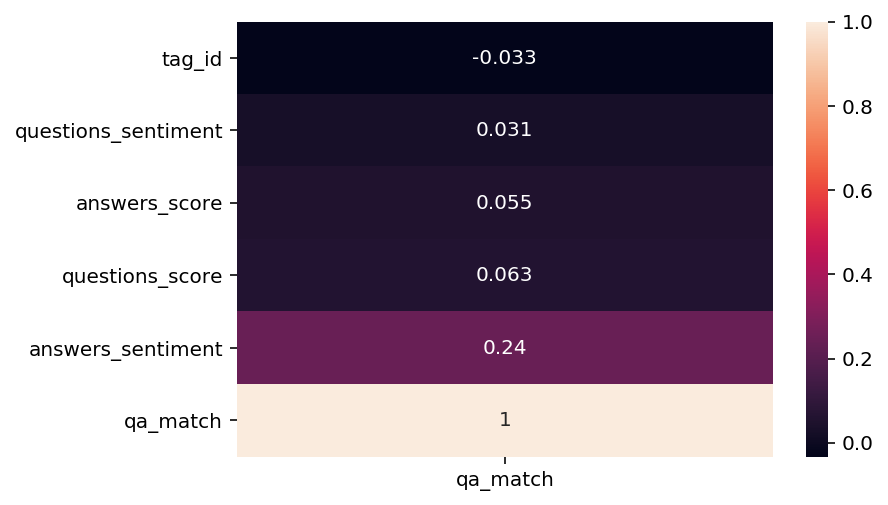

In [44]:
qa_corr = data.corr()[['qa_match']].dropna().sort_values('qa_match')

sns.heatmap(qa_corr, annot=True);

### Exploring `answer_scores`

In [45]:
data['answers_score'].value_counts()

0.0     127954
1.0      36007
2.0      10334
3.0       3404
4.0       1414
5.0        562
6.0        278
7.0        164
8.0        110
9.0         35
12.0        26
11.0        24
10.0        15
13.0        13
14.0        13
15.0         6
17.0         4
22.0         3
25.0         3
18.0         3
20.0         2
19.0         1
30.0         1
Name: answers_score, dtype: int64

In [46]:
data['answers_score'].describe()

count    180376.000000
mean          0.448413
std           0.936107
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          30.000000
Name: answers_score, dtype: float64

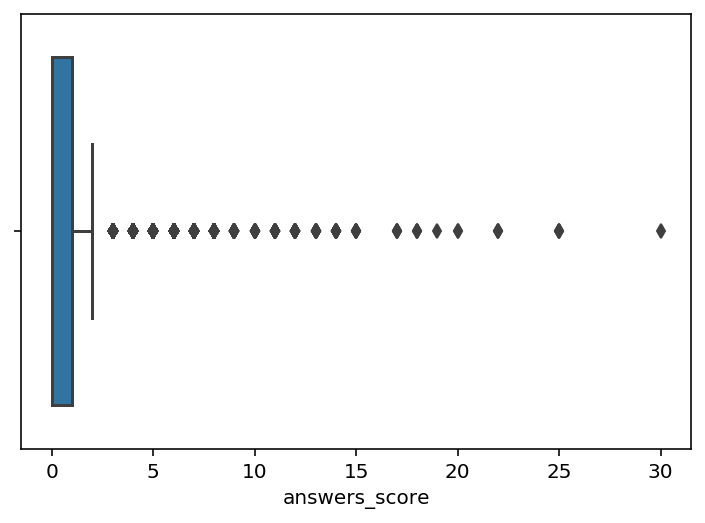

In [47]:
sns.boxplot(data['answers_score']);

### Exploring `questions_score`

In [35]:
data['questions_score'].nunique()

75

In [33]:
data['questions_score'].value_counts()

2.0      33041
3.0      32339
4.0      31773
1.0      21899
5.0      19436
         ...  
38.0         2
81.0         1
84.0         1
65.0         1
123.0        1
Name: questions_score, Length: 75, dtype: int64

In [32]:
data['questions_score'].describe()

count    180376.000000
mean          4.873115
std           7.536732
min           0.000000
25%           2.000000
50%           4.000000
75%           5.000000
max         125.000000
Name: questions_score, dtype: float64

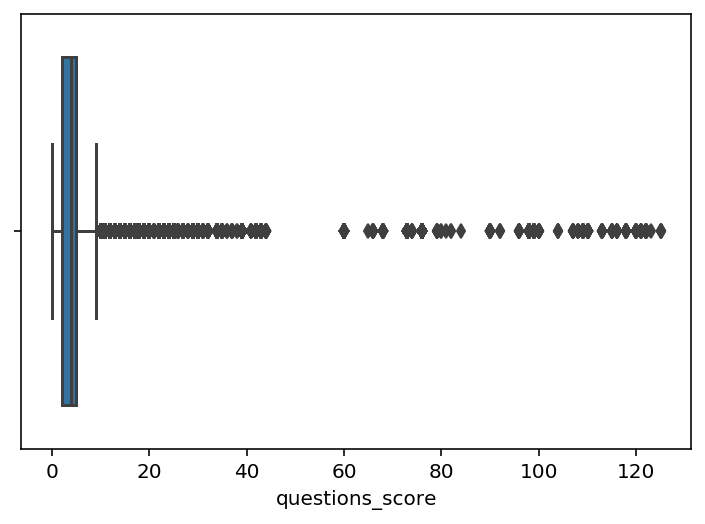

In [30]:
sns.boxplot(data['questions_score']);

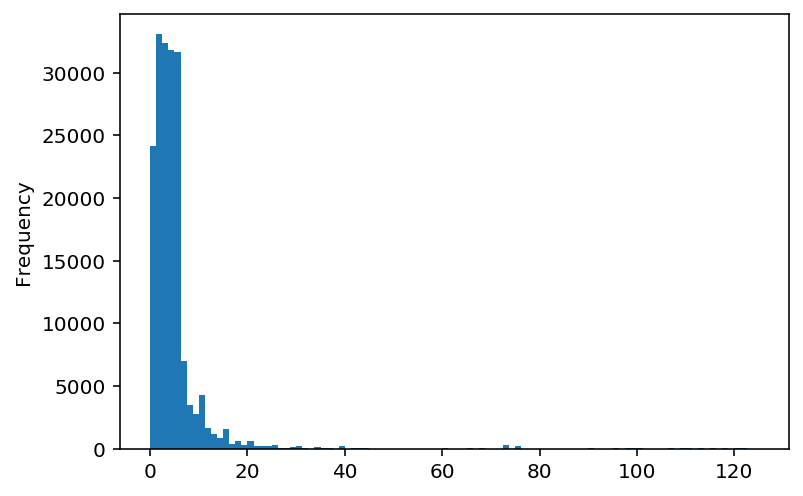

In [39]:
data['questions_score'].plot(kind='hist', bins=100);

## Exporting Data

In [21]:
data.to_csv('./Datasets/cleaned_w_sentiment.csv', index=False)